In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.workflow.validation import Validator

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

Validation on fold 1 of 2 begins.
Validation on fold 2 of 2 begins.
NOIS is 1863.4 and coverage is 91.3%.


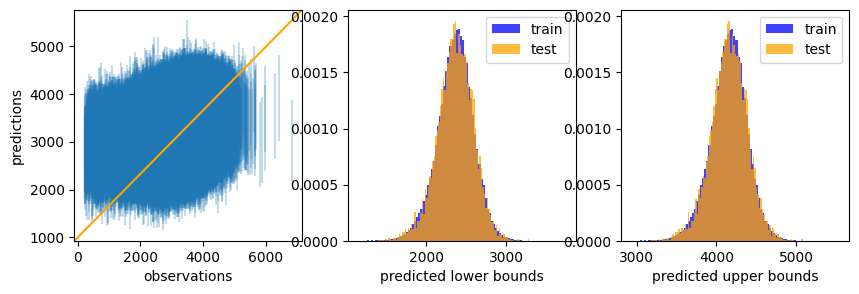

In [5]:
rr_validator = Validator("RidgeRegressor")
rr_validator.fit(data)
rr_validator.print_performance_summary()

lower, upper = rr_validator.predict_intervals(data)
lower_new, upper_new = rr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Validation on fold 2 of 2 begins.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
NOIS is 1635.5 and coverage is 88.3%.


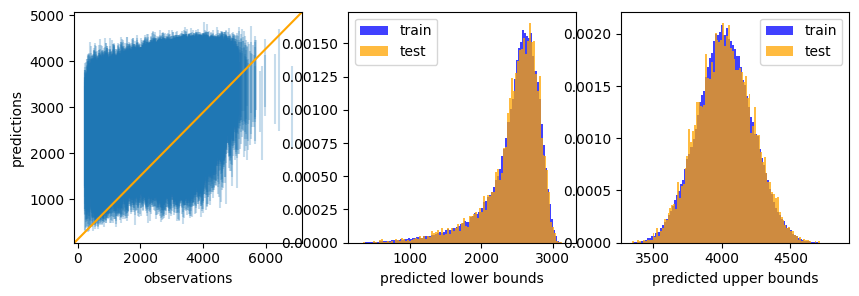

In [6]:
hbr_validator = Validator("HistBoostRegressor")
hbr_validator.fit(data)
hbr_validator.print_performance_summary()

lower, upper = hbr_validator.predict_intervals(data)
lower_new, upper_new = hbr_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
1685/1685 [==============================] - 1s 392us/step
Validation on fold 2 of 2 begins.
1694/1694 [==============================] - 1s 385us/step
NOIS is 1731.3 and coverage is 89.7%.
178/178 [==============================] - 0s 385us/step


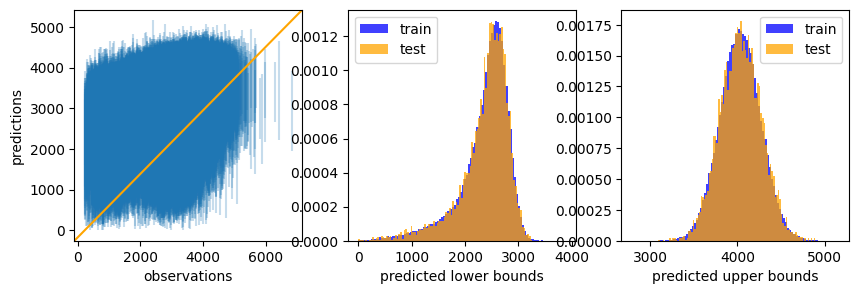

In [7]:
nn_validator = Validator("MissingnessNeuralNet")
nn_validator.fit(data)
nn_validator.print_performance_summary()

lower, upper = nn_validator.predict_intervals(data)
lower_new, upper_new = nn_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 2 begins.
Ensembler fold 1 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
555/555 [==============================] - 0s 424us/step
Ensembler fold 2 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
571/571 [==============================] - 0s 395us/step
Ensembler fold 3 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
567/567 [==============================] - 0s 393us/step
Training the

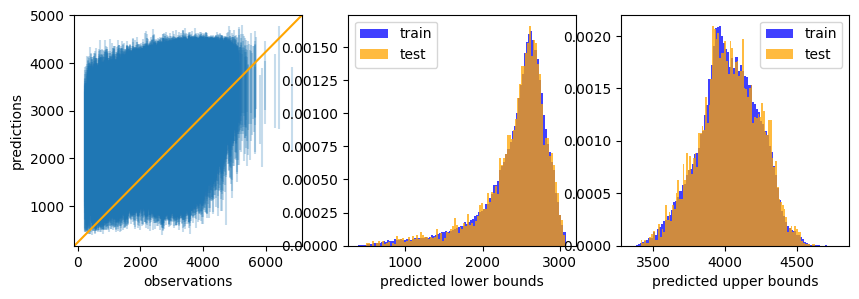

In [8]:
ens_validator = Validator("Ensembler")
ens_validator.fit(data)
ens_validator.print_performance_summary()

lower, upper = ens_validator.predict_intervals(data)
lower_new, upper_new = ens_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

In [12]:
rr_lower, rr_upper = rr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=rr_lower, pi_upper=rr_upper).to_csv(
    "../data/submission_rr.csv",
    index=False,
)

hbr_lower, hbr_upper = hbr_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=hbr_lower, pi_upper=hbr_upper).to_csv(
    "../data/submission_hbr.csv",
    index=False,
)

nn_lower, nn_upper = nn_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=nn_lower, pi_upper=nn_upper).to_csv(
    "../data/submission_nn.csv",
    index=False,
)

ens_lower, ens_upper = ens_validator.predict_intervals(data_test)
data_test[["id"]].assign(pi_lower=ens_lower, pi_upper=ens_upper).to_csv(
    "../data/submission_ens.csv",
    index=False,
)

178/178 [==============================] - 0s 498us/step
